# Problem set 2: Finding the Walras equilibrium in a multi-agent economy

In [22]:
%load_ext autoreload
%autoreload 2
import numpy as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tasks

## Drawing random numbers

Replace the missing lines in the code below to get the same output as in the answer.

In [23]:
import numpy as np
np.random.seed(1986)
state = np.random.get_state()
for i in range(3):
    np.random.set_state(state)
    for j in range(2):
        x = np.random.uniform()
        print(f'({i},{j}): x = {x:.3f}')

(0,0): x = 0.569
(0,1): x = 0.077
(1,0): x = 0.569
(1,1): x = 0.077
(2,0): x = 0.569
(2,1): x = 0.077


**Answer:**

See A1.py

## Find the expectated value

Find the expected value and the expected variance

$$ 
\mathbb{E}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} g(x_i)
$$
$$ 
\mathbb{VAR}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} \left( g(x_i) - \frac{1}{N}\sum_{i=1}^{N} g(x_i) \right)^2
$$

where $ x_i \sim \mathcal{N}(0,\sigma) $ and

$$ 
g(x,\omega)=\begin{cases}
x & \text{if }x\in[-\omega,\omega]\\
-\omega & \text{if }x<-\omega\\
\omega & \text{if }x>\omega
\end{cases} 
$$

In [24]:
sigma = 3.14
omega = 2
N = 10000
np.random.seed(1986)
# write your code here
x = np.random.normal(loc=0, scale=sigma, size=N)

def g(x,omega):
    return np.where(x < -omega, -omega, np.where(x > omega, omega, x))

mean = np.mean(g(x,omega))
var = np.var(g(x,omega))

print(f'mean ={mean:.5f}, var = {var:.5f}')

mean =-0.00264, var = 2.69804


In [25]:
# a. parameter choices
sigma = 3.14
omega = 2
N = 10000
np.random.seed(1986)

# b. draw random numbers
x = np.random.normal(loc=0, scale=sigma, size=N)

# c. transformation function


def g(x, omega):
    y = x.copy()
    y[x < -omega] = -omega
    y[x > omega] = omega
    return y


# d. mean and variance
mean = np.mean(g(x, omega))
var = np.var(g(x-mean, omega))
print(f'mean = {mean:.5f}, var = {var:.5f}')

mean = -0.00264, var = 2.69804


**Answer:**

See A2.py

## Interactive histogram

**First task:** Consider the code below. Fill in the missing lines so the figure is plotted.

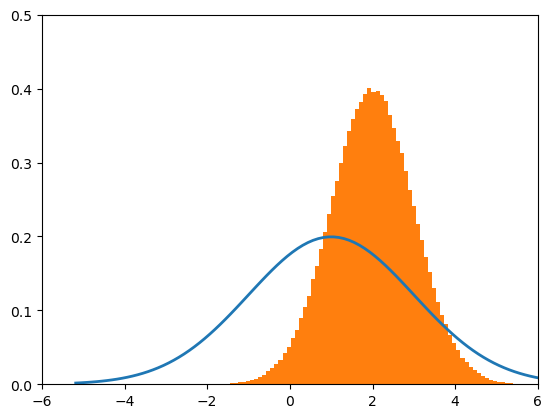

In [26]:
# a. import
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import widgets
from scipy.stats import norm # normal distribution
import numpy as np

# b. plotting figure
def fitting_normal(X,mu_guess,sigma_guess):
    
    # i. normal distribution from guess
    F = norm(loc=mu_guess,scale=sigma_guess)
    
    # ii. x-values
    x_low = F.ppf(0.001)
    x_high = F.ppf(0.999)
    x = np.linspace(x_low,x_high,100)

    # iii. figure
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,F.pdf(x),lw=2)
    ax.hist(X,bins=100,density=True,histtype='stepfilled');
    ax.set_ylim([0,0.5])
    ax.set_xlim([-6,6])

# c. parameters
mu_true = 2
sigma_true = 1
mu_guess = 1
sigma_guess = 2

# d. random draws
X = np.random.normal(loc=mu_true,scale=sigma_true,size=10**6)

# e. figure
try:
    fitting_normal(X,mu_guess,sigma_guess)
except:
    print('failed')

**Second task:** Create an interactive version of the figure with sliders for $\mu$ and $\sigma$.

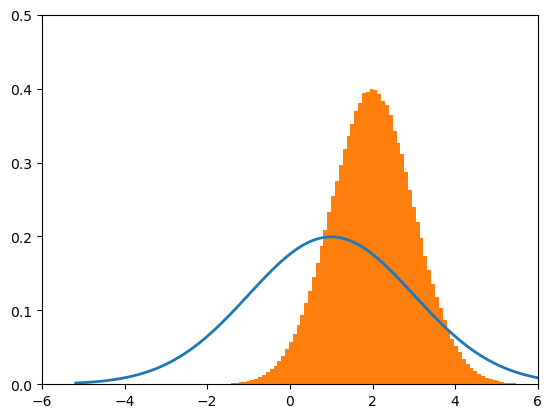

interactive(children=(FloatSlider(value=2.0, description='mu', max=6.0, min=-6.0, step=0.2), FloatSlider(value…

In [27]:
# a. import
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import widgets
from scipy.stats import norm # normal distribution
import numpy as np

# b. plotting figure
def fitting_normal(X,mu_guess,sigma_guess):
    
    # i. normal distribution from guess
    F = norm(loc=mu_guess,scale=sigma_guess)
    
    # ii. x-values
    x_low = F.ppf(0.001)
    x_high = F.ppf(0.999)
    x = np.linspace(x_low,x_high,100)

    # iii. figure
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,F.pdf(x),lw=2)
    ax.hist(X,bins=100,density=True,histtype='stepfilled');
    ax.set_ylim([0,0.5])
    ax.set_xlim([-6,6])

# c. parameters
mu_true = 2
sigma_true = 1
mu_guess = 1
sigma_guess = 2

# d. random draws
X = np.random.normal(loc=mu_true,scale=sigma_true,size=10**6)

# e. figure
try:
    fitting_normal(X,mu_guess,sigma_guess)
except:
    print('failed')

# Write out which arguments to interactive_figure you want to be changing or staying fixed 
widgets.interact(fitting_normal,
    X=widgets.fixed(X),
    mu_guess=widgets.FloatSlider(description=r"mu", min=-6, max=6, step=0.2, value=2),
    sigma_guess=widgets.FloatSlider(description=r"sigma", min=0, max=3, step=0.2,value=1)
);

**Answer:**

See A3.py

## Modules

1. Call the function `myfun` from the module `mymodule` present in this folder.
2. Open VSCode and open the `mymodule.py`, add a new function and call it from this notebook.

In [28]:
import mymodule

mymodule.myfun(4)

mymodule.Rune(7)

hello world!
hello world!
hello world!
hello world!
7


**Answer:**

See A4.py

## Git

1. Try to go to your own personal GitHub main page and create a new repository. Then put your solution to this problem set in it.
2. Pair up with a fellow student. Clone each others repositories and run the code in them.

**IMPORTANT:** You will need **git** for the data project in a few needs. Better learn it know. Remember, that the teaching assistants are there to help you.

# Problem

Consider an **exchange economy** with

1. 2 goods, $(x_1,x_2)$
2. $N$ consumers indexed by $j \in \{1,2,\dots,N\}$
3. Preferences are Cobb-Douglas with truncated normally *heterogenous* coefficients

    $$
    \begin{aligned}
    u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha_{j}}x_{2}^{1-\alpha_{j}}\\
     & \tilde{\alpha}_{j}\sim\mathcal{N}(\mu,\sigma)\\
     & \alpha_j = \max(\underline{\mu},\min(\overline{\mu},\tilde{\alpha}_{j}))
    \end{aligned}
    $$

4. Endowments are *heterogenous* and given by

    $$
    \begin{aligned}
    \boldsymbol{e}^{j}&=(e_{1}^{j},e_{2}^{j}) \\
     &  & e_i^j \sim f, f(x,\beta_i) =  1/\beta_i \exp(-x/\beta)
    \end{aligned}
    $$

**Problem:** Write a function to solve for the equilibrium.

You can use the following parameters:

In [36]:
# a. parameters
N = 10000
mu = 0.5
sigma = 0.2 
mu_low = 0.1
mu_high = 0.9
beta1 = 1.3
beta2 = 2.1
seed = 1986

# b. draws of random numbers
alphas =np.random.normal(loc=mu, scale=sigma, size=N)
alphas = np.fmax(mu_low, np.fmin(mu_high,alphas))
e1=np.random.exponential(scale=beta1, size=N)
e2=np.random.exponential(scale=beta2, size=N)

# c. demand function
def dem_good_1(alphas, p1,p2, e1,e2):
    I=e1*p1+e2*p2
    return alphas*I/p1

def dem_good_2(alphas, p1,p2, e1,e2):
    I = e1*p1+e2*p2
    return (1-alphas)*I/p2
 
# d. excess demand function
def excess_demand_good_1(alphas, p1,p2,e1,e2):
    supply1 = np.sum(e1)
    #sum of demands
    demand1 = np.sum(dem_good_1(alphas,p1,p2,e1,e2))
    excess1 = demand1 - supply1
    
    return excess1

# e. find equilibrium function

def find_equilibrium(alphas, p1, p2, e1, e2, kappa=0.5, eps=1e-8, maxiter=1000):

    t = 0
    while True:

        # a. step 1: excess demand
        Z1 = excess_demand_good_1(alphas, p1, p2, e1, e2)

        # b: step 2: stop?
        if np.abs(Z1) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            break

        # c. step 3: update p1
        p1 = p1 + kappa*Z1/alphas.size

        # d. step 4: return
        if t < 5 or t % 25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')

        t += 1

    return p1

# f. call find equilibrium function
p1 = 1.4
p2 = 1
kappa = 0.1
eps = 1e-8
p1 = find_equilibrium(alphas,p1,p2,e1, e2,kappa=kappa,eps=eps)

  0: p1 =   1.41189888 -> excess demand ->  1189.88806951
  1: p1 =   1.42316052 -> excess demand ->  1126.16386076
  2: p1 =   1.43382886 -> excess demand ->  1066.83389790
  3: p1 =   1.44394375 -> excess demand ->  1011.48925705
  4: p1 =   1.45354146 -> excess demand ->   959.77102707
   ...
 25: p1 =   1.57679266 -> excess demand ->   357.34089728
 50: p1 =   1.63065849 -> excess demand ->   125.31283291
 75: p1 =   1.65000648 -> excess demand ->    45.98547655
100: p1 =   1.65716527 -> excess demand ->    17.14260266
125: p1 =   1.65984197 -> excess demand ->     6.42728950
150: p1 =   1.66084666 -> excess demand ->     2.41494597
175: p1 =   1.66122432 -> excess demand ->     0.90810245
200: p1 =   1.66136635 -> excess demand ->     0.34158041
225: p1 =   1.66141978 -> excess demand ->     0.12849913
250: p1 =   1.66143988 -> excess demand ->     0.04834214
275: p1 =   1.66144744 -> excess demand ->     0.01818690
300: p1 =   1.66145029 -> excess demand ->     0.00684217
325: p1

**Hint:** The code structure is exactly the same as for the exchange economy considered in the lecture. The code for solving that exchange economy is reproduced in condensed form below.

In [ ]:
# a. parameters
N = 1000
k = 2
mu_low = 0.1
mu_high = 0.9
seed = 1986

# b. draws of random numbers
np.random.seed(seed)
alphas = np.random.uniform(low=mu_low,high=mu_high,size=N)

# c. demand function
def demand_good_1_func(alpha,p1,p2,k):
    I = k*p1+p2
    return alpha*I/p1

# d. excess demand function
def excess_demand_good_1_func(alphas,p1,p2,k):
    
    # a. demand
    demand = np.sum(demand_good_1_func(alphas,p1,p2,k))
    
    # b. supply
    supply = k*alphas.size
    
    # c. excess demand
    excess_demand = demand-supply
    
    return excess_demand

# e. find equilibrium function
def find_equilibrium(alphas,p1,p2,k,kappa=0.5,eps=1e-8,maxiter=500):
    
    t = 0
    while True:

        # a. step 1: excess demand
        Z1 = excess_demand_good_1_func(alphas,p1,p2,k)
        
        # b: step 2: stop?
        if  np.abs(Z1) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            break    
    
        # c. step 3: update p1
        p1 = p1 + kappa*Z1/alphas.size
            
        # d. step 4: return 
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')
            
        t += 1    

    return p1

# e. call find equilibrium function
p1 = 1.4
p2 = 1
kappa = 0.1
eps = 1e-8
p1 = find_equilibrium(alphas,p1,p2,k,kappa=kappa,eps=eps)

  0: p1 =   1.33690689 -> excess demand ->  -630.93108302
  1: p1 =   1.27551407 -> excess demand ->  -613.92820358
  2: p1 =   1.21593719 -> excess demand ->  -595.76882769
  3: p1 =   1.15829785 -> excess demand ->  -576.39340748
  4: p1 =   1.10272273 -> excess demand ->  -555.75114178
   ...
 25: p1 =   0.53269252 -> excess demand ->   -53.80455643
 50: p1 =   0.50897770 -> excess demand ->    -0.27125769
 75: p1 =   0.50886603 -> excess demand ->    -0.00120613
100: p1 =   0.50886553 -> excess demand ->    -0.00000536
125: p1 =   0.50886553 -> excess demand ->    -0.00000002
130: p1 =   0.50886553 -> excess demand ->    -0.00000001


**Answers:**

See A5.py

## Save and load

Consider the code below and fill in the missing lines so the code can run without any errors.

In [42]:
import pickle

# a. create some data
my_data = {}
my_data['A'] = {'a':1,'b':2}
my_data['B'] = np.array([1,2,3])
my_data['C'] = (1,2,3)

my_np_data = {}
my_np_data['D'] = np.array([1,2,3])
my_np_data['E'] = np.zeros((5,8))
my_np_data['F'] = np.ones((2,6))

# c. save with pickle
with open(f'data.p', 'wb') as f:
    pickle.dump(my_data, f)
    
# d. save with numpy
    np.savez(f'data.npz',**my_np_data)
    
# a. try
def load_all():
    with open(f'data.p', 'rb') as f:
        data = pickle.load(f)
        A = data['A']
        B = data['B']
        C = data['C']

    with np.load(f'data.npz') as data:
        D = data['D']
        E = data['E']
        F = data['F']        
    
    print('variables loaded without error')
    
try:
    load_all()
except:
    print('failed')

variables loaded without error


**Answer:**

See A6.py

# Extra Problems

## Multiple goods

Solve the main problem extended with multiple goods:

$$
\begin{aligned}
u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha^1_{j}} \cdot x_{2}^{\alpha^2_{j}} \cdots x_{M}^{\alpha^M_{j}}\\
 &  \alpha_j = [\alpha^1_{j},\alpha^2_{j},\dots,\alpha^M_{j}] \\
 &  \log(\alpha_j) \sim \mathcal{N}(0,\Sigma) \\
\end{aligned}
$$

where $\Sigma$ is a valid covariance matrix.

In [47]:
# a. choose parameters
N = 10000
J = 3


# b. choose Sigma
Sigma_lower = np.array([[1, 0, 0], [0.5, 1, 0], [0.25, -0.5, 1]])
Sigma_upper = Sigma_lower.T
Sigma = Sigma_upper@Sigma_lower
print(Sigma)

# c. draw random numbers
alphas = np.exp(np.random.multivariate_normal(np.zeros(J), Sigma, 10000))
print(np.mean(alphas,axis=0))
print(np.corrcoef(alphas.T))

# d. define demand

# c. demand function for all goods
def demand_func(alpha, prices, k):
    I = np.dot(k, prices)  # income is the dot product of individual consumption bundle k and prices
    demand = alpha * I / prices  # demand for each good
    return demand

# d. excess demand function for all goods
def excess_demand_func(alphas, prices, k):
    # calculate demand for all individuals and all goods
    demands = np.array([demand_func(alphas[i], prices, k[i]) for i in range(N)])
    # aggregate demand across individuals
    aggregate_demand = np.sum(demands, axis=0)
    # aggregate supply for each good (assuming fixed for simplicity)
    supply = k.sum(axis=0)
    # excess demand for each good
    excess_demand = aggregate_demand - supply
    return excess_demand

# e. find equilibrium function (extended to handle multiple goods)
def find_equilibrium_numeraire(alphas, prices, k, numeraire_index, kappa=0.1, eps=1e-8, maxiter=500):
    t = 0
    while True:
        # a. step 1: calculate excess demand for all goods except numeraire
        Z = excess_demand_func(alphas, prices, k)
        
        # b. only adjust prices for goods that are not the numeraire
        for i in range(len(prices)):
            if i != numeraire_index:
                prices[i] = prices[i] + kappa * Z[i] / N
                
                # Avoid negative prices
                prices[i] = max(prices[i], 0)
        
        # c. step 2: check if excess demand for non-numeraire goods is below threshold
        if np.all(np.abs(Z[np.arange(len(Z)) != numeraire_index]) < eps) or t >= maxiter:
            print(f'{t:3d}: prices = {prices} -> excess demands -> {Z}')
            break
        
        if t < 5 or t % 25 == 0:
            print(f'{t:3d}: prices = {prices} -> excess demands -> {Z}')
        elif t == 5:
            print('   ...')
        
        t += 1
    
    return prices

# f. set initial parameters and call the new find equilibrium function
numeraire_index = 0  # for example, choosing the first good as the numeraire
initial_prices = np.array([1.0, 1.2, 1.0])  # set the numeraire price to 1
equilibrium_prices = find_equilibrium_numeraire(alphas, initial_prices, k, numeraire_index, kappa=0.1, eps=eps, maxiter=maxiter)

# f. set initial parameters and call the find equilibrium function
initial_prices = np.array([5, 6, 7])  # initial guess for the prices of goods
k = np.ones((N, J))  # initial consumption bundle (fixed for simplicity)
eps = 1e-8
maxiter = 500
equilibrium_prices = find_equilibrium(alphas, initial_prices, k, kappa=10, eps=eps, maxiter=maxiter)

[[ 1.3125  0.375   0.25  ]
 [ 0.375   1.25   -0.5   ]
 [ 0.25   -0.5     1.    ]]
[1.91849855 1.88322329 1.64320634]
[[ 1.          0.18794998  0.12344696]
 [ 0.18794998  1.         -0.19761657]
 [ 0.12344696 -0.19761657  1.        ]]
  0: prices = [1.         1.60219288 1.42582603] -> excess demands -> [51391.95358907 40219.28785605 42582.60274955]
  1: prices = [1.         1.97564768 1.79003878] -> excess demands -> [67277.48429265 37345.47966407 36421.27482605]
  2: prices = [1.         2.32992157 2.12751568] -> excess demands -> [81429.62544288 35427.38997375 33747.69014671]
  3: prices = [1.         2.67103397 2.44902587] -> excess demands -> [94700.85453124 34111.23993463 32151.01945741]
  4: prices = [1.         3.00253127 2.75965939] -> excess demands -> [107413.25938531  33149.72919648  31063.35188665]
   ...
 25: prices = [1.         9.23406718 8.53412679] -> excess demands -> [339604.18048691  28340.87090059  26198.3865304 ]
 50: prices = [ 1.         16.17726997 14.94978167